Mini Project 1

Kenan Stredic

Question 1:

In [4]:
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

            x1        x2    y
0     1.186215  0.222277  yes
1    -0.947284 -1.097843  yes
2    -0.345574 -1.121768  yes
3     0.252324 -0.421623  yes
4    -1.334506  0.318044  yes
...        ...       ...  ...
9995 -0.653133  2.093432   no
9996  1.579994  1.328697   no
9997 -0.621886  2.124475   no
9998  1.221905  1.134416   no
9999  1.174712  1.667680   no

[10000 rows x 3 columns]


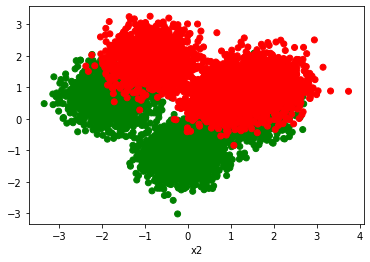

In [6]:
# Read training data
train = pd.read_csv(r'C:\Users\kstre_3ikvnbf\STAT 4360\Mini Project 1\1-training_data.csv')
# Show training data
print(train)
# Plot training data
trainX = train[['x1','x2']]
trainY = train['y']
colors = {'yes': 'green', 'no' : 'red'}
plot.scatter(train['x1'], train['x2'], c = train['y'].map(colors))
plot.xlabel('x1')
plot.xlabel('x2')
plot.show()

In [7]:
# Read test data
test = pd.read_csv(r'C:\Users\kstre_3ikvnbf\STAT 4360\Mini Project 1\1-test_data.csv')
# Show test data
print(test)
# Show test data shape
testX = test[['x1','x2']]
testY = test['y']
testY.shape

            x1        x2    y
0     1.094037  0.075606  yes
1     0.097076 -1.686667  yes
2    -2.375122  1.443267  yes
3     0.251887 -0.629266  yes
4    -0.667831 -0.877857  yes
...        ...       ...  ...
1995 -1.429182  1.643267   no
1996  0.606632  1.183987   no
1997  1.580306  0.994228   no
1998  0.978071  1.439919   no
1999 -0.976735  1.788324   no

[2000 rows x 3 columns]


(2000,)

Apply KNN
K = 1

In [8]:
mod = KNeighborsClassifier(n_neighbors=1)
mod.fit(trainX, trainY)
mod_train = mod.predict(trainX)
mod_test = mod.predict(testX)

#Training error
print(1-(mod_train == trainY).mean())
# Test error
print(1-(mod_test == testY).mean())

0.0
0.17049999999999998


Fit KNN for several values of K

In [9]:
ks = np.arange(1, 201, 5)
ks
nks = ks.shape

err_rate_train = np.zeros(nks)
err_rate_test = np.zeros(nks)

for i, k in enumerate(ks):
    mod = KNeighborsClassifier(n_neighbors=k)
    mod.fit(trainX, trainY)
    mod_train = mod.predict(trainX)
    mod_test = mod.predict(testX)
    err_rate_train[i] = 1- (mod_train == trainY).mean()
    err_rate_test[i] = 1- (mod_test == testY).mean()

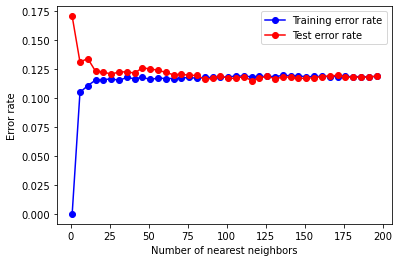

Training error:  0.11780000000000002  and Test error:  0.11599999999999999 at K = 80


In [6]:
# Plot test and training errors vs the number of nearest neighbors
plot.plot(ks, err_rate_train, "bo-", label= "Training error rate")
plot.plot(ks, err_rate_test, "ro-", label= "Test error rate" )
plot.xlabel('Number of nearest neighbors')
plot.ylabel('Error rate')
plot.legend(loc="best")
plot.show()
# training and test error first intersect at K = 80
# training and test error rate index is 16 at K = 80 
print("Training error: ", err_rate_train[17], " and Test error: ", err_rate_test[17], "at K = 80")

In [10]:
# Determine decision boundary at K = 80
k_opt = 80
n_grid = 50
x1_grid = np.linspace(trainX.x1.min(), trainX.x1.max(), num = n_grid)
x2_grid = np.linspace(trainX.x2.min(), trainX.x2.max(), num = n_grid)
xx, yy = np.meshgrid(x1_grid,x2_grid, indexing = 'ij')
grid = np.hstack((xx.reshape([-1,1]), yy.reshape([-1,1])))
print(grid.shape)

mod = KNeighborsClassifier(n_neighbors=k_opt)
mod.fit(trainX.to_numpy(), trainY)

prob = mod.predict_proba(grid)[:,1]
probs = prob.reshape([n_grid, n_grid])
print(prob)

(2500, 2)
[1.     1.     1.     ... 0.0125 0.0125 0.0125]


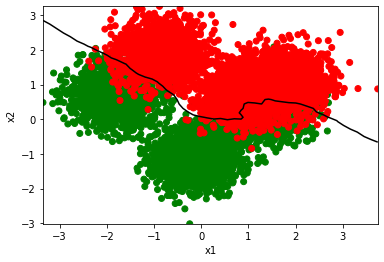

In [8]:
# Plot decision boundary
plot.scatter(train['x1'], train['x2'], c=train['y'].map(colors))
plot.contour(xx, yy, probs, [0.5],colors = 'black')
plot.xlabel('x1')
plot.ylabel('x2')
plot.show()